# Specification of a Petrinet and Reachbility Graph

In [1]:
import pandas as pd
import numpy as np
from datetime import date
from IPython.display import Markdown, display
import matplotlib.pyplot as plt
import seaborn as sns

#!pip install pm4py --user
from pm4py.objects.conversion.log import converter as log_converter
from pm4py.objects.log.importer.xes import importer as xes_importer

# process mining 
from pm4py.algo.discovery.alpha import algorithm as alpha_miner
from pm4py.algo.discovery.inductive import algorithm as inductive_miner
from pm4py.algo.discovery.heuristics import algorithm as heuristics_miner
from pm4py.algo.discovery.dfg import algorithm as dfg_discovery
from pm4py.algo.discovery.footprints import algorithm as footprints_discovery


# viz
from pm4py.visualization.petri_net import visualizer as pn_visualizer
from pm4py.visualization.footprints import visualizer as fp_visualizer
from pm4py.visualization.transition_system import visualizer as ts_visualizer
from pm4py.visualization.process_tree import visualizer as pt_visualizer
from pm4py.visualization.heuristics_net import visualizer as hn_visualizer
from pm4py.visualization.dfg import visualizer as dfg_visualization

# misc 
from pm4py.objects.petri_net.utils import reachability_graph
from pm4py.objects.conversion.process_tree import converter as pt_converter
from pm4py.objects.petri_net.obj import PetriNet, Marking
from pm4py.algo.simulation.playout.petri_net import algorithm as simulator

import pm4py

The following code models and analyses a simple process in a doctor's office. A patient first waits to be served. Than she either receives consultation, makes an appointment or gets a prescription.

In [2]:
net = PetriNet("doctor_net")

In [3]:
# creating places: source, p_1 and sink place
source = PetriNet.Place("source")
sink = PetriNet.Place("sink")
p_1 = PetriNet.Place("p_1")
# add the places to the Petri Net
net.places.add(source)
net.places.add(sink)
net.places.add(p_1)

In [4]:
# Create transitions
t_1 = PetriNet.Transition("waiting", "waiting")
t_2 = PetriNet.Transition("appointment", "appointment")
t_3 = PetriNet.Transition("prescription", "prescription")
t_4 = PetriNet.Transition("consultation", "consultation")

# Add the transitions to the Petri Net
net.transitions.add(t_1)
net.transitions.add(t_2)
net.transitions.add(t_3)
net.transitions.add(t_4)

In [5]:
# Add arcs
from pm4py.objects.petri_net.utils import petri_utils
petri_utils.add_arc_from_to(source, t_1, net)
petri_utils.add_arc_from_to(t_1, p_1, net)
petri_utils.add_arc_from_to(p_1, t_2, net)
petri_utils.add_arc_from_to(t_2, sink, net)
petri_utils.add_arc_from_to(p_1, t_3, net)
petri_utils.add_arc_from_to(t_3, sink, net)
petri_utils.add_arc_from_to(p_1, t_4, net)
petri_utils.add_arc_from_to(t_4, sink, net)

(consultation, 'consultation')->sink

In [6]:
# Adding tokens
initial_marking = Marking()
initial_marking[source] = 1
final_marking = Marking()
final_marking[sink] = 1

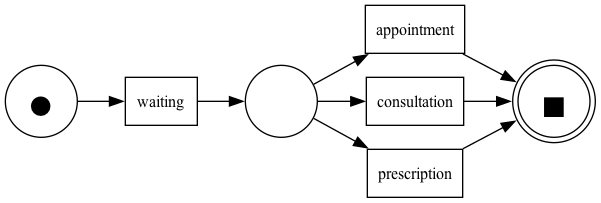

In [7]:
pm4py.view_petri_net(net, initial_marking, final_marking)

In [8]:
# next we create a reachability graph for the petri net
ts = reachability_graph.construct_reachability_graph(net, initial_marking)

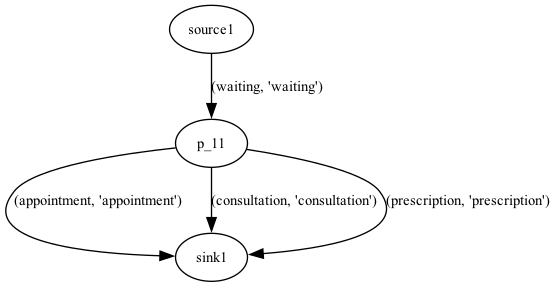

In [9]:
gviz = ts_visualizer.apply(ts)
ts_visualizer.view(gviz)

In [10]:
# play out all possible traces from the petri net
simulated_log = simulator.apply(net, initial_marking, variant=simulator.Variants.EXTENSIVE)
for trac in simulated_log:
    print(trac.attributes["concept:name"])
    # iterate over the activities (i.e. the transitions) of the trace
    for act in trac:
        print(act)

0
{'concept:name': 'waiting', 'time:timestamp': datetime.datetime(1970, 4, 26, 18, 46, 41)}
{'concept:name': 'appointment', 'time:timestamp': datetime.datetime(1970, 4, 26, 18, 46, 42)}
1
{'concept:name': 'waiting', 'time:timestamp': datetime.datetime(1970, 4, 26, 18, 46, 43)}
{'concept:name': 'prescription', 'time:timestamp': datetime.datetime(1970, 4, 26, 18, 46, 44)}
2
{'concept:name': 'waiting', 'time:timestamp': datetime.datetime(1970, 4, 26, 18, 46, 45)}
{'concept:name': 'consultation', 'time:timestamp': datetime.datetime(1970, 4, 26, 18, 46, 46)}
